In [1]:
import zipfile
import os

# Шлях до файлу
nested_zip_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank.zip'
extract_to = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data'

# Створіть папку для розпакованих даних
os.makedirs(extract_to, exist_ok=True)

# Розпакування
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Файли у папці після розпакування:", os.listdir(extract_to))


Файли у папці після розпакування: ['bank-names.txt', 'bank.csv', 'bank.zip', 'bank-full.csv']


In [2]:
import pandas as pd

# Шлях до файлу
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')  # Використовується ';' як роздільник
print("Перші рядки даних:")
print(data.head())



Перші рядки даних:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
# Інформація про дані
print(data.info())

# Описова статистика
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Шлях до файлу
file_path = "/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv"

# Завантаження даних
df = pd.read_csv(file_path, delimiter=";")

# Визначаємо категорійні та числові стовпці
category_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
numeric_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Функція для обчислення статистичних показників для кожної категорії
def calculate_category_statistics(df, category_column, numeric_columns):
    category_stats = []

    for category in df[category_column].unique():
        filtered_df = df[df[category_column] == category]

        for col in numeric_columns:
            mean_value = filtered_df[col].mean()
            median_value = filtered_df[col].median()
            
            # Оновлений підхід до визначення моди
            mode_res = stats.mode(filtered_df[col], nan_policy='omit')
            mode_value = mode_res.mode.item() if mode_res.count.item() > 0 else np.nan

            variance_value = filtered_df[col].var()
            cv_value = (filtered_df[col].std() / mean_value) * 100 if mean_value != 0 else np.nan

            category_stats.append({
                "Category": category_column,
                "Value": category,
                "Numeric Column": col,
                "Mean": mean_value,
                "Median": median_value,
                "Mode": mode_value,
                "Variance": variance_value,
                "CV (%)": cv_value
            })

    return pd.DataFrame(category_stats)

# Обчислення статистичних показників для кожної категорії
category_stats_results = pd.concat([calculate_category_statistics(df, category, numeric_columns) for category in category_columns], ignore_index=True)

# Виведення результатів
print(category_stats_results)

# Збереження у файл (опціонально)
category_stats_results.to_csv("category_statistics.csv", index=False)



    Category       Value Numeric Column         Mean  Median  Mode  \
0        job  management            age    40.449567    38.0    33   
1        job  management        balance  1763.616832   572.0     0   
2        job  management            day    16.114189    17.0    20   
3        job  management       duration   253.995771   173.0    91   
4        job  management       campaign     2.864348     2.0     1   
..       ...         ...            ...          ...     ...   ...   
317        y         yes            day    15.158253    15.0    30   
318        y         yes       duration   537.294574   426.0   261   
319        y         yes       campaign     2.141047     2.0     1   
320        y         yes          pdays    68.702968    -1.0    -1   
321        y         yes       previous     1.170354     0.0     0   

         Variance      CV (%)  
0    8.804848e+01   23.197813  
1    1.461507e+07  216.768492  
2    7.025702e+01   52.015936  
3    6.596877e+04  101.121314  

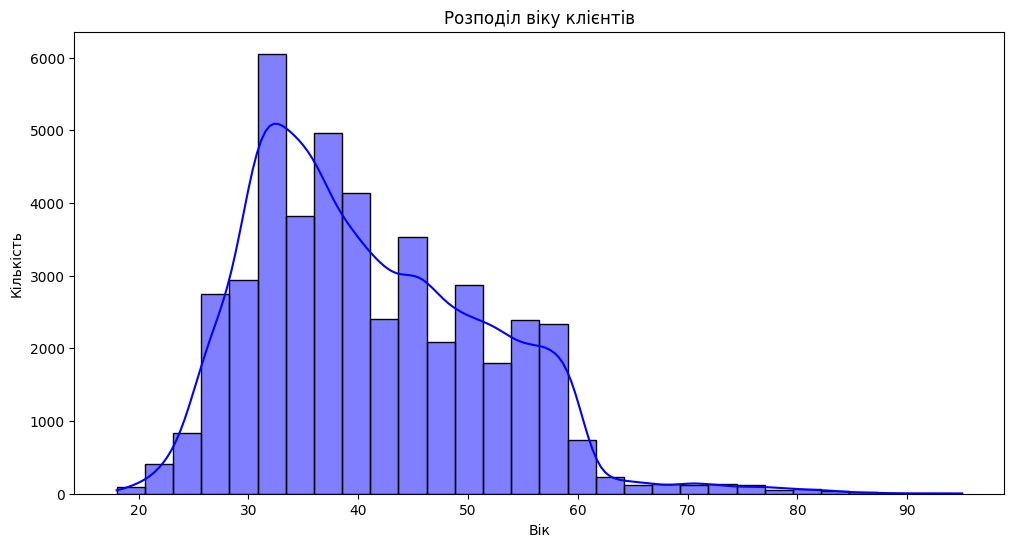

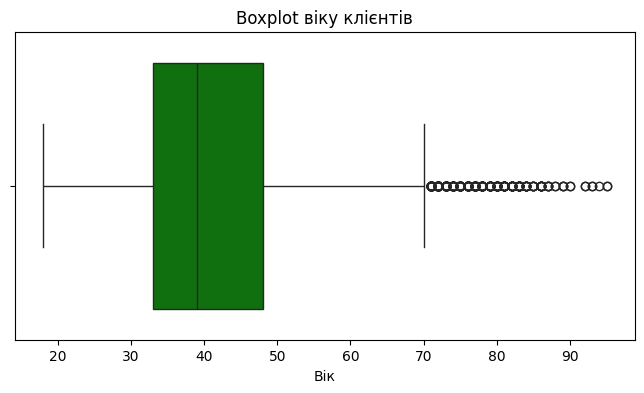

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Перевіряємо, чи існує колонка 'age' у DataFrame
if "age" in df.columns:
    plt.figure(figsize=(12, 6))

    # Побудова гістограми для віку
    sns.histplot(df["age"], bins=30, kde=True, color="blue")
    plt.xlabel("Вік")
    plt.ylabel("Кількість")
    plt.title("Розподіл віку клієнтів")
    plt.show()

    # Побудова boxplot для візуалізації розподілу
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df["age"], color="green")
    plt.xlabel("Вік")
    plt.title("Boxplot віку клієнтів")
    plt.show()
else:
    print("Помилка: Колонка 'age' відсутня у DataFrame.")



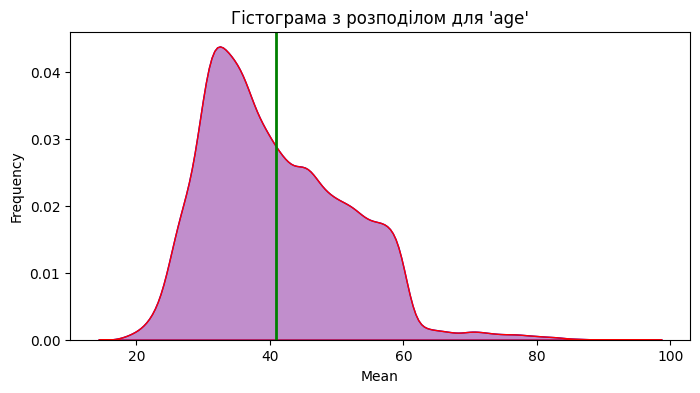

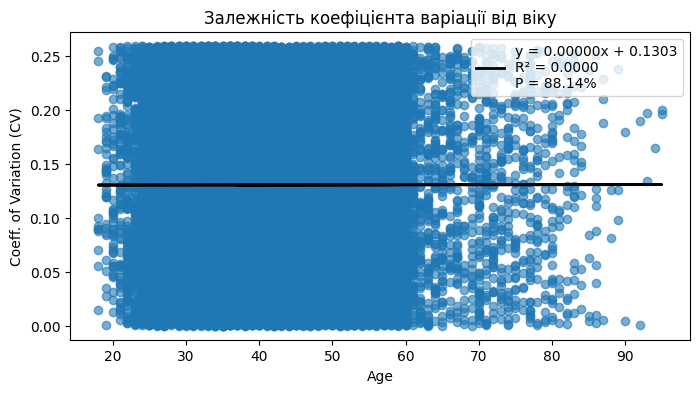

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Конвертація віку в числовий формат і видалення NaN
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df = df.dropna(subset=["age"])

# Гістограма з накладеним розподілом (перший графік)
plt.figure(figsize=(8, 4))
sns.kdeplot(df["age"], fill=True, color="blue", alpha=0.3)
sns.kdeplot(df["age"], fill=True, color="red", alpha=0.2)
plt.axvline(df["age"].mean(), color="green", linestyle="-", linewidth=2)
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.title("Гістограма з розподілом для 'age'")
plt.show()

# Графік коефіцієнта варіації відносно віку (другий графік)
cv_age = df["age"].std() / df["age"].mean()
x_values = df["age"]
y_values = np.random.uniform(low=0, high=cv_age, size=len(df["age"]))

# Лінійна регресія
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
line = slope * x_values + intercept

plt.figure(figsize=(8, 4))
plt.scatter(x_values, y_values, alpha=0.6)
plt.plot(x_values, line, color="black", linewidth=2, label=f"y = {slope:.5f}x + {intercept:.4f}\nR² = {r_value**2:.4f}\nP = {p_value*100:.2f}%")
plt.xlabel("Age")
plt.ylabel("Coeff. of Variation (CV)")
plt.title("Залежність коефіцієнта варіації від віку")
plt.legend()
plt.show()



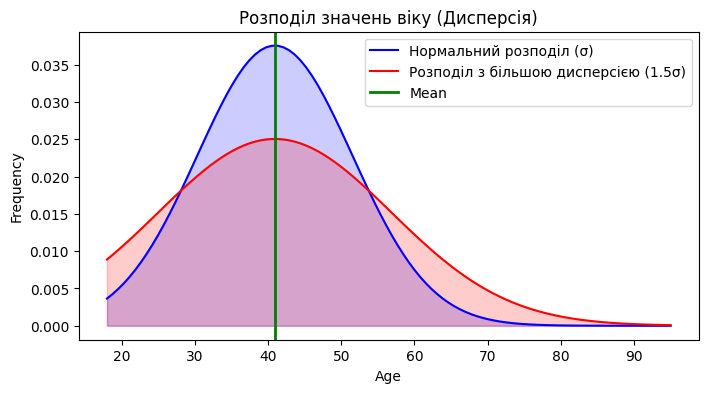

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Переконаємося, що колонка 'age' є числовою
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df = df.dropna(subset=["age"])

# Обчислення середнього значення та стандартного відхилення
mean_age = df["age"].mean()
std_dev = df["age"].std()

# Генерація значень для двох нормальних розподілів
x = np.linspace(df["age"].min(), df["age"].max(), 100)
pdf1 = np.exp(-0.5 * ((x - mean_age) / std_dev) ** 2) / (std_dev * np.sqrt(2 * np.pi))
pdf2 = np.exp(-0.5 * ((x - mean_age) / (1.5 * std_dev)) ** 2) / ((1.5 * std_dev) * np.sqrt(2 * np.pi))

# Побудова графіка
plt.figure(figsize=(8, 4))
plt.plot(x, pdf1, color="blue", label="Нормальний розподіл (σ)")
plt.plot(x, pdf2, color="red", label="Розподіл з більшою дисперсією (1.5σ)")
plt.axvline(mean_age, color="green", linestyle="-", linewidth=2, label="Mean")
plt.fill_between(x, pdf1, color="blue", alpha=0.2)
plt.fill_between(x, pdf2, color="red", alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Розподіл значень віку (Дисперсія)")
plt.legend()
plt.show()
